In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
filename = "https://raw.githubusercontent.com/ENVS110a-SP23/group8-project/main/BKB_WaterQualityData_2020084%20(1).csv"
df = pd.read_csv(filename)
sns.set_theme()

# do this two lines of code below actually drop the values, or do I need to remove them still?
df.loc[df.isnull().any(axis=1),:].reset_index(drop=True)
df.loc[df.isin(['Not Recorded']).any(axis=1),:].reset_index(drop=True)

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,A,NaN,8/11/1999,3.0,2.60,7.7,0.60,0.60,26.0,NaN,80.96,23:02,Not Recorded,NaN,NaN,27.200000,1999
1,A,NaN,8/18/1999,3.0,1.60,8.7,NaN,NaN,31.0,NaN,91.40,9:36,Not Recorded,NaN,NaN,33.000000,1999
2,A,NaN,9/8/1999,1.8,1.35,8.2,0.40,1.00,28.0,NaN,76.60,14:24,Not Recorded,NaN,NaN,24.777778,1999
3,A,NaN,10/15/1999,0.1,5.65,7.3,0.60,0.80,20.0,NaN,NaN,0:00,Not Recorded,NaN,NaN,-17.777778,1999
4,A,NaN,11/10/1999,0.0,6.70,7.6,0.65,0.95,18.0,NaN,NaN,0:00,Not Recorded,NaN,NaN,-17.777778,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,D,NaN,10/22/2013,0.0,7.00,6.5,1.00,1.20,17.0,NaN,58.00,0:00,Not Recorded,NaN,NaN,14.444444,2013
1221,D,NaN,11/12/2013,0.0,NaN,6.0,0.80,1.10,12.0,NaN,54.00,0:00,Not Recorded,NaN,NaN,12.222222,2013
1222,D,NaN,11/19/2013,0.0,9.60,6.5,1.20,1.20,12.0,NaN,52.00,0:00,Not Recorded,NaN,NaN,11.111111,2013
1223,D,NaN,12/4/2013,0.0,NaN,6.5,1.20,1.20,10.0,NaN,51.00,0:00,Not Recorded,NaN,NaN,10.555556,2013


PearsonRResult(statistic=0.3030473415686472, pvalue=3.200957705080505e-32)


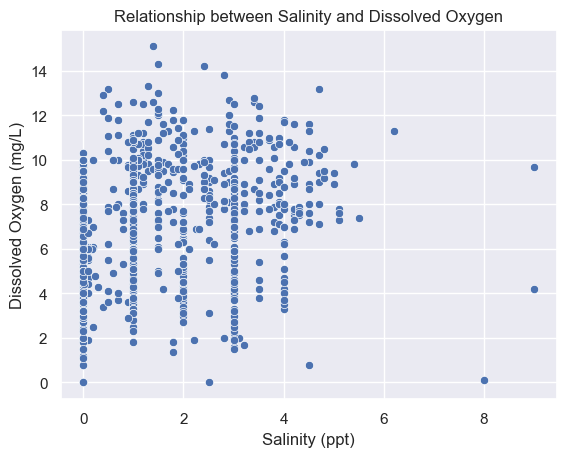

In [17]:
df_sub = df.loc[(df['Salinity (ppt)'].notnull()) & (df['Dissolved Oxygen (mg/L)'].notnull()),:].reset_index(drop=True)
ax = sns.scatterplot(x='Salinity (ppt)', y='Dissolved Oxygen (mg/L)', data=df_sub)
ax.set_title('Relationship between Salinity and Dissolved Oxygen') # add title
# can't figure out how to save the figure correctly to the git path online
plt.savefig('Salinity_vs_Dissolved_Oxygen_Scatterplot.png')
print(stats.pearsonr(df_sub['Salinity (ppt)'], df_sub['Dissolved Oxygen (mg/L)']))


Correlation between Salinity (ppt) and Dissolved Oxygen (mg/L):
                         Salinity (ppt)  Dissolved Oxygen (mg/L)  \
Salinity (ppt)                 1.000000                 0.303047   
Dissolved Oxygen (mg/L)        0.303047                 1.000000   
pH (standard units)            0.305178                 0.056197   
Secchi Depth (m)              -0.158061                -0.052864   
Water Depth (m)               -0.075305                -0.006511   
Water Temp (?C)                0.006429                -0.525993   
Air Temp-Celsius               0.087555                -0.333206   
Air Temp (?F)                  0.095180                -0.456090   
AirTemp (C)                    0.071170                -0.311399   
Year                          -0.622196                -0.361268   

                         pH (standard units)  Secchi Depth (m)  \
Salinity (ppt)                      0.305178         -0.158061   
Dissolved Oxygen (mg/L)             0.056197         -0

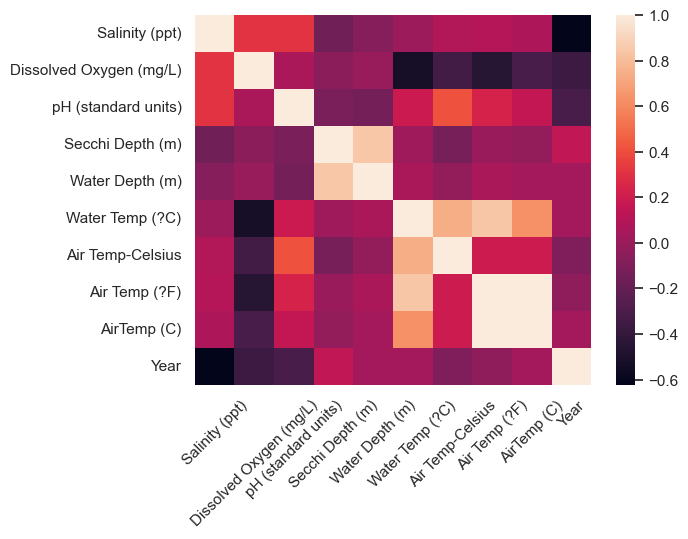

In [22]:
print('Correlation between Salinity (ppt) and Dissolved Oxygen (mg/L):')
correlations = df_sub.corr()
# not sure why this isn't printing nicely in a table
print(correlations)
sns.heatmap(correlations)
plt.xticks(rotation=45)
plt.savefig('Correlation_Matrix.png')